In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
from collections import OrderedDict 
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Normalize the files to use i.e. same number of lines
f = open("126015.txt", "r")
book1 = f.read()
book1_lines = book1.split('\n')
random.shuffle(book1_lines)
book1_part1 = book1_lines[:len(book1_lines)//2]
book1_part2 = book1_lines[len(book1_lines)//2:]
f.close()

wf = open("126015_1.txt", "w+")
wf.write('\n'.join(book1_part1))
wf.close()

wf = open("126015_2.txt", "w+")
wf.write('\n'.join(book1_part2))
wf.close()

In [4]:
# Normalize second file.
f = open("524590.txt", "r")
book2 = f.read()
book2_lines = book2.split('\n')
random.shuffle(book2_lines)
book2_normalized = book2_lines[:len(book1_lines)//2]
f.close()

wf = open("524590_1.txt", "w+")
wf.write('\n'.join(book2_normalized))
wf.close()

In [5]:
def get_word_len_freq(path):
    f = open(path, "r")
    book1 = f.read()
    
    # Tokenize based on NLTK and regexp split criteria.
    book1_words = word_tokenize(book1)
    tokenizer = RegexpTokenizer(r'\w+')
    book1_words = tokenizer.tokenize(" ".join(book1_words))
    
    stop_words = set(stopwords.words('english')) 
    
    # Remove punctuation.
    book1_words = [x.lower() for x in book1_words if not x in string.punctuation]
    # Remove stop words.
    book1_words = [x for x in book1_words if not x in stop_words]
    # Stem words.
    ps = PorterStemmer()
    book1_words = [ps.stem(x) for x in book1_words]
    
    book1_word_freq = {}
    for word in book1_words:
        if book1_word_freq.get(len(word)):
            book1_word_freq[len(word)] += 1
        else:
            book1_word_freq[len(word)] = 1
    
    return book1_word_freq

In [6]:
def get_word_freq(path):
    f = open(path, "r")
    book1 = f.read()
    
    # Tokenize based on NLTK and regexp split criteria.
    book1_words = word_tokenize(book1)
    tokenizer = RegexpTokenizer(r'\w+')
    book1_words = tokenizer.tokenize(" ".join(book1_words))
    
    stop_words = set(stopwords.words('english')) 
    
    # Remove punctuation.
    book1_words = [x.lower() for x in book1_words if not x in string.punctuation]
    # Remove stop words.
    book1_words = [x for x in book1_words if not x in stop_words]
    # Stem words.
    ps = PorterStemmer()
    book1_words = [ps.stem(x) for x in book1_words]
    
    book1_word_freq = {}
    for word in book1_words:
        if book1_word_freq.get(word):
            book1_word_freq[word] += 1
        else:
            book1_word_freq[word] = 1
    
    return book1_word_freq

In [7]:
# 126015 - Perfect Obedience A Bride’s Vow
# Genre: Historical Romance Fiction
book1_len_freq = get_word_len_freq("126015_1.txt")
# 126015 - Perfect Obedience A Bride’s Vow
# Genre: Historical Romance Fiction
book2_len_freq = get_word_len_freq("126015_2.txt")
# 524590 - 48 Hours To Die
# Genre: Thriller Fiction
book3_len_freq = get_word_len_freq("524590_1.txt")

In [8]:
book1_len_freq

{4: 7142,
 5: 4233,
 3: 2247,
 8: 390,
 9: 130,
 6: 2697,
 7: 1118,
 10: 41,
 2: 180,
 11: 2,
 1: 7,
 12: 5,
 13: 1}

In [9]:
book2_len_freq

{5: 4102,
 6: 2710,
 3: 2014,
 4: 7288,
 7: 1119,
 8: 426,
 2: 216,
 9: 134,
 10: 43,
 12: 7,
 11: 3,
 1: 8,
 13: 1}

In [10]:
min_length = 1
max_length = max(max(book1_len_freq.keys()), max(book2_len_freq.keys()), max(book3_len_freq.keys()))

In [11]:
xvalues = [i for i in range(min_length, max_length+1)]

yvalues1_norm = sum(book1_len_freq.values())
yvalues1 = []
for i in range(min_length, max_length+1):
    if book1_len_freq.get(i):
        yvalues1.append(book1_len_freq.get(i) / yvalues1_norm)
    else:
        yvalues1.append(0)
        
yvalues2_norm = sum(book2_len_freq.values())
yvalues2 = []
for i in range(min_length, max_length+1):
    if book2_len_freq.get(i):
        yvalues2.append(book2_len_freq.get(i) / yvalues2_norm)
    else:
        yvalues2.append(0)

yvalues3_norm = sum(book3_len_freq.values())
yvalues3 = []
for i in range(min_length, max_length+1):
    if book3_len_freq.get(i):
        yvalues3.append(book3_len_freq.get(i) / yvalues3_norm)
    else:
        yvalues3.append(0)

In [12]:
sum_yvalues1 = [sum(yvalues1[:i+1]) for i in range(len(yvalues1))]
sum_yvalues2 = [sum(yvalues2[:i+1]) for i in range(len(yvalues2))]
sum_yvalues3 = [sum(yvalues3[:i+1]) for i in range(len(yvalues3))]

<IPython.core.display.Javascript object>


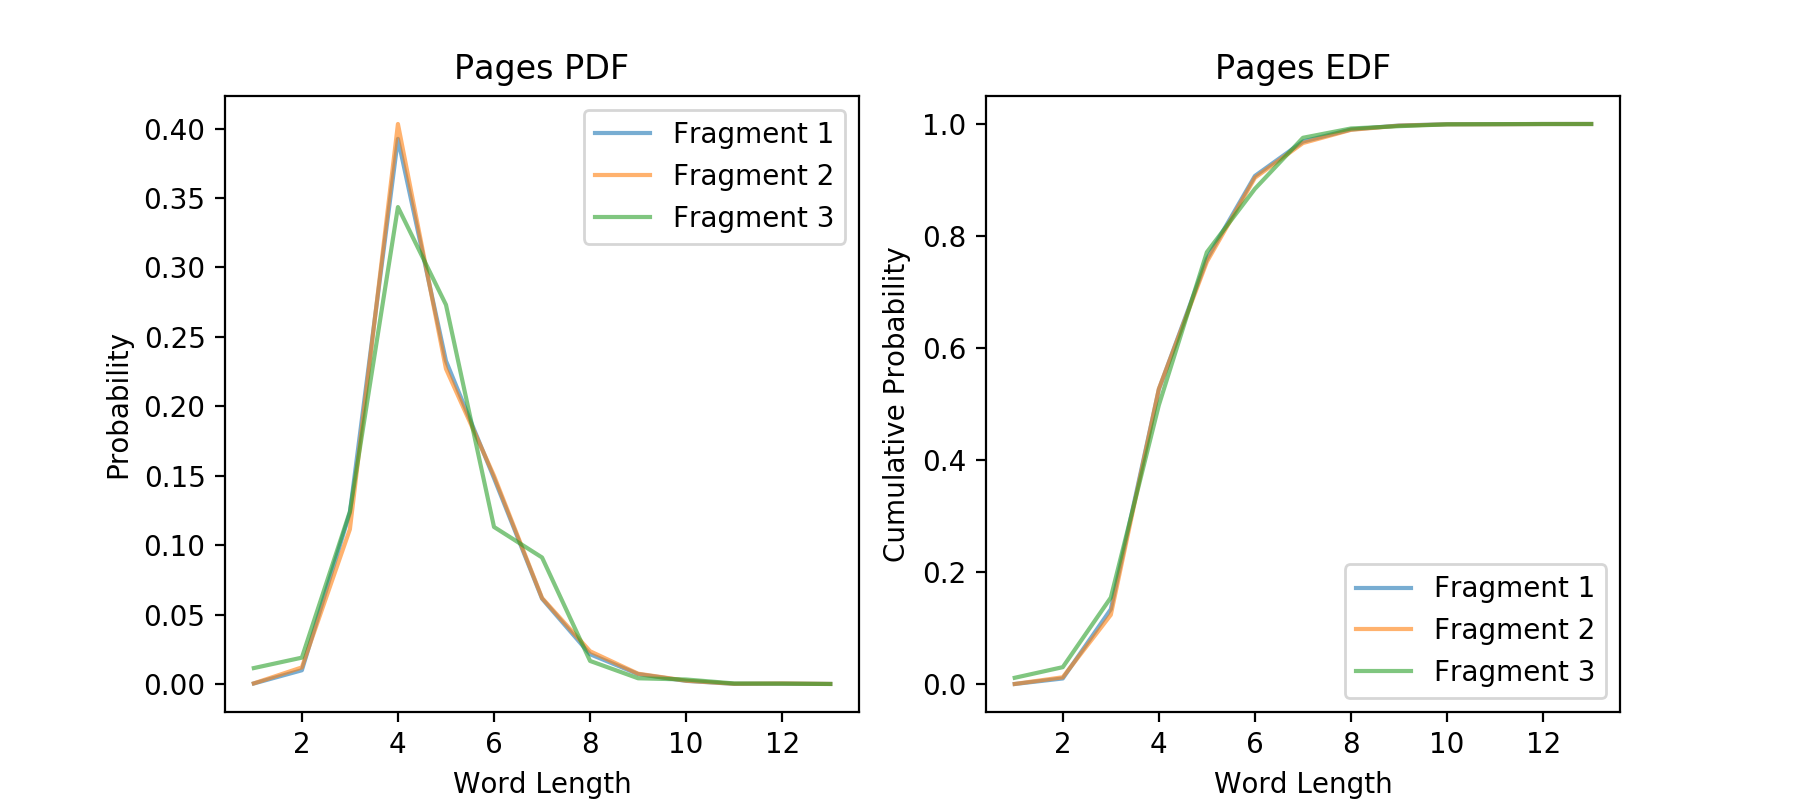

In [15]:
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
plt.title("Pages PDF")
plt.xlabel("Word Length")
plt.ylabel("Probability")
plt.plot(xvalues, yvalues1, label="Fragment 1", alpha=0.6)
plt.plot(xvalues, yvalues2, label="Fragment 2", alpha=0.6)
plt.plot(xvalues, yvalues3, label="Fragment 3", alpha=0.6)
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Pages EDF")
plt.xlabel("Word Length")
plt.ylabel("Cumulative Probability")
plt.plot(xvalues, sum_yvalues1, label="Fragment 1", alpha=0.6)
plt.plot(xvalues, sum_yvalues2, label="Fragment 2", alpha=0.6)
plt.plot(xvalues, sum_yvalues3, label="Fragment 3", alpha=0.6)
plt.legend()
plt.show()

$\begin{equation}D_{F, G} = \max_{x_i\in x} \{ |F(x_i)-G(x_i)| \} \end{equation}$